# Data-Analysis

## Import fuction

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
import datetime
import random

%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
from scipy import stats
formato ='{:,.2f}'.format
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',62)
import seaborn as sns
sns.set_style("darkgrid")



In [2]:
import math
#Separar los datos entrenamiento y prueba
from sklearn.model_selection import train_test_split


#Escalar Variables
from sklearn.preprocessing import MinMaxScaler


#Evaluación del modelo
from sklearn import metrics
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve


#Creación de modelo
from sklearn.linear_model import LogisticRegression


In [3]:
from imblearn.under_sampling import RandomUnderSampler

In [4]:
!pip install chart_studio
import chart_studio


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.4/64.4 kB 1.2 MB/s eta 0:00:00


In [5]:
#!pip install plotly
import plotly.graph_objs  as  go
import chart_studio.dashboard_objs as dashboard
import chart_studio.plotly.plotly
import chart_studio.plotly as py  #Because plotly is deprecated
import plotly.express as px

import IPython.display
from IPython.display import Image




In [6]:
!pip install dash
from dash import Dash, dcc, html, Input, Output
import plotly.express as px

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 18.9 MB/s eta 0:00:00


In [7]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Lasso

## Load of data

In [8]:
'''from google.colab import drive
drive.mount('/')
https://drive.google.com/file/d/1LO5o4xgW0PtaJ8JfHdtGIPpvp7V3dI0D/view?usp=drive_link'''

"from google.colab import drive\ndrive.mount('/')\nhttps://drive.google.com/file/d/1LO5o4xgW0PtaJ8JfHdtGIPpvp7V3dI0D/view?usp=drive_link"

In [9]:
file_id = "1LO5o4xgW0PtaJ8JfHdtGIPpvp7V3dI0D"

In [10]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [11]:
id = "1LO5o4xgW0PtaJ8JfHdtGIPpvp7V3dI0D"

print (id) # Verify that you have everything after '='

1LO5o4xgW0PtaJ8JfHdtGIPpvp7V3dI0D


In [12]:
#bd = pd.read_csv("full-data2.csv",index_col=0,low_memory=False,delimiter= ";")
downloaded = drive.CreateFile({'id':id})
downloaded.GetContentFile('full-data2.csv')
bd = pd.read_csv('full-data2.csv',sep=";")
# Dataset is now stored in a Pandas Dataframe

<ipython-input-12-4a0ee428272c>:4: DtypeWarning: Columns (31) have mixed types. Specify dtype option on import or set low_memory=False.
  bd = pd.read_csv('full-data2.csv',sep=";")


In [13]:
df=bd
df.shape

(274602, 49)

First import the master databases with the translations

In [14]:
from google.colab import files
uploaded = files.upload()

Saving Maestras_traduccion_variables.xlsx to Maestras_traduccion_variables.xlsx


In [15]:

t_Month=pd.read_excel('Maestras_traduccion_variables.xlsx'
                    ,dtype=str
                     ,sheet_name='Mes')
t_Month['Mes']=t_Month['Mes'].str.upper()
df['Mes']=df['Mes'].str.upper()
df=pd.merge(df, t_Month,how='left', on='Mes')
df=df.drop(['Mes'],axis='columns')



In [16]:
t_Gender=pd.read_excel('Maestras_traduccion_variables.xlsx',
                       dtype=str,
                       sheet_name='Genero')
t_Gender['Genero']=t_Gender['Genero'].str.upper()
df['Genero']=df['Genero'].str.upper()
df=pd.merge(df, t_Gender,how='left', on='Genero')
df=df.drop(['Genero'],axis='columns')


In [17]:

t_Age_Group=pd.read_excel('Maestras_traduccion_variables.xlsx',
                    dtype=str,
                    sheet_name='GRUPO EDAD')
t_Age_Group['GRUPO']=t_Age_Group['GRUPO'].str.upper()
df['GRUPO']=df['GRUPO'].str.upper()
df=pd.merge(df, t_Age_Group,how='left', on='GRUPO')
df=df.drop(['GRUPO'],axis='columns')



In [18]:

t_Regime=pd.read_excel('Maestras_traduccion_variables.xlsx'
                    ,dtype=str
                    ,sheet_name='REGIMEN')
t_Regime['Regimen']=t_Regime['Regimen'].str.upper()
df['Regimen']=df['Regimen'].str.upper()
df=pd.merge(df, t_Regime, how='left',on='Regimen')
df=df.drop(['Regimen'],axis='columns')



In [19]:

t_Doctor_Name=pd.read_excel('Maestras_traduccion_variables.xlsx'
                    ,dtype=str
                    ,sheet_name='DOCTOR_NAME')
t_Doctor_Name['Nombre Profesional']=t_Doctor_Name['Nombre Profesional'].str.upper()
df['Nombre Profesional']=df['Nombre Profesional'].str.upper()
df=pd.merge(df, t_Doctor_Name, how='left',on='Nombre Profesional')
df=df.drop(['Nombre Profesional'],axis='columns')



In [20]:
t_Specialties=pd.read_excel('Maestras_traduccion_variables.xlsx'
                    ,dtype=str
                    ,sheet_name='Especialidad')
t_Specialties['Especialidad']=t_Specialties['Especialidad'].str.upper()
df['Especialidad']=df['Especialidad'].str.upper()
df=pd.merge(df, t_Specialties,how='left', on='Especialidad')
df=df.drop(['Especialidad'],axis='columns')



In [21]:
t_Type_of_Consultation=pd.read_excel('Maestras_traduccion_variables.xlsx'
                    ,dtype=str
                    ,sheet_name='Tipo Consulta')
t_Type_of_Consultation['Tipo Consulta']=t_Type_of_Consultation['Tipo Consulta'].str.upper()
df['Tipo Consulta']=df['Tipo Consulta'].str.upper()
df=pd.merge(df, t_Type_of_Consultation,how='left', on='Tipo Consulta')
df=df.drop(['Tipo Consulta'],axis='columns')



In [22]:
t_Type_SVC=pd.read_excel('Maestras_traduccion_variables.xlsx'
                    ,dtype=str
                    ,sheet_name='Tipo SVC')
t_Type_SVC['Tipo SVC']=t_Type_SVC['Tipo SVC'].str.upper()
df['Tipo SVC']=df['Tipo SVC'].str.upper()
df=pd.merge(df, t_Type_SVC, how='left',on='Tipo SVC')
df=df.drop(['Tipo SVC'],axis='columns')



In [23]:
t_Specialty_Classification=pd.read_excel('Maestras_traduccion_variables.xlsx'
                    ,dtype=str
                    ,sheet_name='Clasificacion especialidad')
t_Specialty_Classification['Clasificacion especialidad']=t_Specialty_Classification['Clasificacion especialidad'].str.upper()
df['Clasificacion especialidad']=df['Clasificacion especialidad'].str.upper()
df=pd.merge(df, t_Specialty_Classification,how='left', on='Clasificacion especialidad')
df=df.drop(['Clasificacion especialidad'],axis='columns')


In [24]:
t_Population_Group=pd.read_excel('Maestras_traduccion_variables.xlsx'
                    ,dtype=str
                    ,sheet_name='GrupoPoblacional')
t_Population_Group['GrupoPoblacional']=t_Population_Group['GrupoPoblacional'].str.upper()
df['GrupoPoblacional']=df['GrupoPoblacional'].str.upper()
df=pd.merge(df, t_Population_Group,how='left', on='GrupoPoblacional')
df=df.drop(['GrupoPoblacional'],axis='columns')

Change the variable name

In [25]:
df.rename(columns={'Sede':'Headquarters','Año':'Year','Mes':'Month','Atención':'Care_Number','Ingreso':'Ingress_Number','TipoIdentificacion':'Type identification','Identificación':'Identification','Nombre':'Name','Genero':'Gender','Edad':'Age','GRUPO':'Age_Group','F. Cita':'Appointment_Date','Hora':'Appointment_time','F. Asignación':'Assignment_Date','FechaDeseada':'Desired_Date','Modalidad':'Modality','Regimen':'Regime','CausaCancelacion':'Cancellation_Causes','COD ERP':'COD_ERP','ERP VALIDADA':'ERP','ERP':'ERP2','Cod. Servicio':'Service_Code','Nom. Servicio':'Service_Name','Cod. Dx':'Code_Dx','Dx Principal':'Principal_Dx','Cod. DxRel1':'Code_Related_Dx1','Dx Relacionado1':'Related_Dx1','Cod. DxRel2':'Code_Related_Dx2','DescripcionDxRelacionado2':'Related_Dx2','Cod. DxRel3':'Code_Related_Dx3','Dx Relacionado3':'Related_Dx3','CC. Profesional':'Doctor_ID','Nombre Profesional':'Doctor_Name','Estado':'Original_Status','Estado- 2':'Status','Tipo Cita':'Appointment_type','Tipo Cita R':'Appointment_type_R','Especialidad':'Specialties','Servicio Habilitado':'Service_Enabled','Tipo Consulta':'Type_of_consultation','Tipo Consulta R':'Type_of_consultation_R','Unidad':'Unit','Tipo SVC':'Type_of_Service','Clasificacion especialidad':'Specialty_Classification','FormatosPyP':'PYP','GrupoPoblacional':'Population_Group','PertenenciaEtnica':'Ethnicity','Oportunidad Asignacion':'Wait_time_between_Assignment_Appointment','Oportunidad (sin festivos y fin de semanas) Fecha deseada':'Wait_time_between_DesiredDate_Appointment',
},inplace=True)

It was decided to eliminate the following variables from the database:

-*Private patient information:*
**Type identification**
**Identification**
**Name**

-*Variables captured at the time of the medical appointment, so the No-Show does not have this information:*
**Ingress_Number**
**Code_Dx**
**Principal_Dx**
**Code_Related_Dx1**
**Related_Dx1**
**Code_Related_Dx2**
**Related_Dx2**
**Code_Related_Dx3**
**Related_Dx3**

-*Variables with repeated information, no information ,or inaccurate information: hospital administration*
**Modality**
**Cancellation_Causes**
**COD_ERP**
**ERP2**
**Service_Code**
**Service_Name**
**Doctor_ID**
**Original_Status**
**Appointment_type**
**Appointment_type_R**
**Service_Enabled**
**Type_of_consultation_R**
**Unit**
**PYP**
**Ethnicity**


In [26]:
df.to_excel('df_t.xlsx',index=False, encoding='utf-8',sheet_name="Sheet1")

# Review

In [ ]:
df = df.drop(['Type identification' ,'Identification','Name','Ingress_Number','Code_Dx','Principal_Dx','Code_Related_Dx1','Related_Dx1','Code_Related_Dx2','Related_Dx2','Code_Related_Dx3','Related_Dx3','Modality','Cancellation_Causes','COD_ERP','ERP2','Service_Code','Service_Name','Doctor_ID','Original_Status','Appointment_type','Appointment_type_R','Service_Enabled','Type_of_consultation_R','Unit','PYP','Ethnicity'], axis='columns')

df.head()

,Headquarters,Year,Care_Number,Age,Appointment_Date,Appointment_time,Assignment_Date,Desired_Date,ERP,Status,Wait_time_between_Assignment_Appointment,Wait_time_between_DesiredDate_Appointment,Month,Gender,Age_Group,Regime,Doctor_Name,Specialties,Type_of_consultation,Type_of_Service,Specialty_Classification,Population_Group
0,LEON XIII,2023,6444457,87,1/01/2023,0.291667,1/01/2023,1/01/2023,NUEVA EPS S.A. PGP,Show,0,0,JANUARY,FEMALE,6. OLD ADULTS FROM 60 YEARS OLD AND OVER,CONTRIBUTORY,DOCTOR435,GP (GENERAL PRACTITIONER/GENERAL MEDICINE),NORMAL,GENERAL MEDICINE,NOT APPLICABLE,GENERAL POPULATION
1,LEON XIII,2023,6444536,73,1/01/2023,0.541667,1/01/2023,1/01/2023,ALIANZA MEDELLIN ANTIOQUIA EPS S.A.S PGP,Show,0,0,JANUARY,FEMALE,6. OLD ADULTS FROM 60 YEARS OLD AND OVER,SUBSIDIZED,DOCTOR435,GP (GENERAL PRACTITIONER/GENERAL MEDICINE),NORMAL,GENERAL MEDICINE,NOT APPLICABLE,GENERAL POPULATION
2,LEON XIII,2023,6443204,25,2/01/2023,0.291667,30/12/2022,2/01/2023,PRODIAGNOSTICO SA,Show,0,1,JANUARY,FEMALE,4. YOUNG ADULTS 18 TO 28 YEARS OLD,NOT APPLICABLE,DOCTOR430,ANESTHESIOLOGY,PRE-SURGICAL,SPECIALIZED MEDICINE,SPECIALIZED,GENERAL POPULATION
3,LEON XIII,2023,6443219,6,2/01/2023,0.305556,30/12/2022,2/01/2023,PRODIAGNOSTICO SA,No-Show,0,1,JANUARY,MALE,2. CHILDREN 6 TO 11 YEARS OLD,NOT APPLICABLE,DOCTOR430,ANESTHESIOLOGY,PRE-SURGICAL,SPECIALIZED MEDICINE,SPECIALIZED,GENERAL POPULATION
4,LEON XIII,2023,6443238,8,2/01/2023,0.347222,30/12/2022,2/01/2023,PRODIAGNOSTICO SA,Show,0,1,JANUARY,FEMALE,2. CHILDREN 6 TO 11 YEARS OLD,NOT APPLICABLE,DOCTOR430,ANESTHESIOLOGY,PRE-SURGICAL,SPECIALIZED MEDICINE,SPECIALIZED,GENERAL POPULATION


The base initially had 48 variables and after excluding the variables mentioned above, the base is left with 22 variables.

In [ ]:
df["Status"].value_counts()

Show       240389
No-Show     34213
Name: Status, dtype: int64

In [ ]:
df.replace({'Status':{"Show":0,"No-Show":1}},inplace=True)

df['Status'].value_counts()

0    240389
1     34213
Name: Status, dtype: int64

**New variable with year+month->quantitative variable**

In [ ]:
#Change the variable: Month for number
df['Month_N']=df['Month'].str.lower()
df.replace({'Month_N':{"january":0,"february":1,"march":2,"april":3,"may":4,"june":5,"july":6,"august":7,"september":8,"october":9,"november":10,"december":11}},inplace=True)
df['Month_N']

0         0
1         0
2         0
3         0
4         0
         ..
274597    5
274598    5
274599    5
274600    5
274601    5
Name: Month_N, Length: 274602, dtype: int64

In [ ]:
#Chance the variable: Year for number 2 and 3
df['Year_N']=df['Year'].astype(str)
df.replace({'Year_N':{"2022":2,"2023":3}},inplace=True)
df['Year_N']

#Join of Month + Year= Year_N+(Month-1)/12

df['Year+Month']=df['Year_N']+((df['Month_N'])/12)
df['Year+Month']


0         3.000000
1         3.000000
2         3.000000
3         3.000000
4         3.000000
            ...   
274597    2.416667
274598    2.416667
274599    2.416667
274600    2.416667
274601    2.416667
Name: Year+Month, Length: 274602, dtype: float64

As can be seen, there is no NA in the variables

# Data set

In [ ]:
df1=df

In [ ]:
df['Specialties'].value_counts()

GP (GENERAL PRACTITIONER/GENERAL MEDICINE)        89770
NURSING                                           20950
PSYCHOLOGY                                        16398
INTERNAL MEDICINE                                 15796
NUTRITION AND DIETETICS                           12498
ORTHOPEDICS                                       11656
PSYCHIATRY                                         9159
ALLERGOLOGY                                        8594
DERMATOLOGY                                        6140
SPORTS MEDICINE                                    5448
OCCUPATIONAL MEDICINE                              5291
PEDIATRIC NEUROLOGY                                5197
PHYSIATRY OR PHYSICAL MEDICINE                     4683
ANESTHESIOLOGY                                     4671
GENERAL SURGERY                                    4253
UROLOGY                                            4041
NEUROLOGY                                          3584
GYNECOLOGY                                      

In [ ]:
#df1.loc[df1['Specialties'] != "SPORTS MEDICINE", 'Specialties'] = 'Other Specialties'
#df1.head()

In [ ]:
df.loc[df1['Specialties'] != "SPORTS MEDICINE", 'Specialties'] = 'Other Specialties'
df.head()

,Headquarters,Year,Care_Number,Age,Appointment_Date,Appointment_time,Assignment_Date,Desired_Date,ERP,Status,Wait_time_between_Assignment_Appointment,Wait_time_between_DesiredDate_Appointment,Month,Gender,Age_Group,Regime,Doctor_Name,Specialties,Type_of_consultation,Type_of_Service,Specialty_Classification,Population_Group,Month_N,Year_N,Year+Month
0,LEON XIII,2023,6444457,87,1/01/2023,0.291667,1/01/2023,1/01/2023,NUEVA EPS S.A. PGP,0,0,0,JANUARY,FEMALE,6. OLD ADULTS FROM 60 YEARS OLD AND OVER,CONTRIBUTORY,DOCTOR435,Other Specialties,NORMAL,GENERAL MEDICINE,NOT APPLICABLE,GENERAL POPULATION,0,3,3.0
1,LEON XIII,2023,6444536,73,1/01/2023,0.541667,1/01/2023,1/01/2023,ALIANZA MEDELLIN ANTIOQUIA EPS S.A.S PGP,0,0,0,JANUARY,FEMALE,6. OLD ADULTS FROM 60 YEARS OLD AND OVER,SUBSIDIZED,DOCTOR435,Other Specialties,NORMAL,GENERAL MEDICINE,NOT APPLICABLE,GENERAL POPULATION,0,3,3.0
2,LEON XIII,2023,6443204,25,2/01/2023,0.291667,30/12/2022,2/01/2023,PRODIAGNOSTICO SA,0,0,1,JANUARY,FEMALE,4. YOUNG ADULTS 18 TO 28 YEARS OLD,NOT APPLICABLE,DOCTOR430,Other Specialties,PRE-SURGICAL,SPECIALIZED MEDICINE,SPECIALIZED,GENERAL POPULATION,0,3,3.0
3,LEON XIII,2023,6443219,6,2/01/2023,0.305556,30/12/2022,2/01/2023,PRODIAGNOSTICO SA,1,0,1,JANUARY,MALE,2. CHILDREN 6 TO 11 YEARS OLD,NOT APPLICABLE,DOCTOR430,Other Specialties,PRE-SURGICAL,SPECIALIZED MEDICINE,SPECIALIZED,GENERAL POPULATION,0,3,3.0
4,LEON XIII,2023,6443238,8,2/01/2023,0.347222,30/12/2022,2/01/2023,PRODIAGNOSTICO SA,0,0,1,JANUARY,FEMALE,2. CHILDREN 6 TO 11 YEARS OLD,NOT APPLICABLE,DOCTOR430,Other Specialties,PRE-SURGICAL,SPECIALIZED MEDICINE,SPECIALIZED,GENERAL POPULATION,0,3,3.0


In [ ]:
df['Specialties'].value_counts()

Other Specialties    269154
SPORTS MEDICINE        5448
Name: Specialties, dtype: int64

In [ ]:
d = df[['Year+Month','Age','Appointment_time','Status','Wait_time_between_Assignment_Appointment','Wait_time_between_DesiredDate_Appointment','Gender','Regime','Type_of_consultation','Type_of_Service','Specialty_Classification','Population_Group','Specialties']]
d.head()

,Year+Month,Age,Appointment_time,Status,Wait_time_between_Assignment_Appointment,Wait_time_between_DesiredDate_Appointment,Gender,Regime,Type_of_consultation,Type_of_Service,Specialty_Classification,Population_Group,Specialties
0,3.0,87,0.291667,0,0,0,FEMALE,CONTRIBUTORY,NORMAL,GENERAL MEDICINE,NOT APPLICABLE,GENERAL POPULATION,Other Specialties
1,3.0,73,0.541667,0,0,0,FEMALE,SUBSIDIZED,NORMAL,GENERAL MEDICINE,NOT APPLICABLE,GENERAL POPULATION,Other Specialties
2,3.0,25,0.291667,0,0,1,FEMALE,NOT APPLICABLE,PRE-SURGICAL,SPECIALIZED MEDICINE,SPECIALIZED,GENERAL POPULATION,Other Specialties
3,3.0,6,0.305556,1,0,1,MALE,NOT APPLICABLE,PRE-SURGICAL,SPECIALIZED MEDICINE,SPECIALIZED,GENERAL POPULATION,Other Specialties
4,3.0,8,0.347222,0,0,1,FEMALE,NOT APPLICABLE,PRE-SURGICAL,SPECIALIZED MEDICINE,SPECIALIZED,GENERAL POPULATION,Other Specialties


In [ ]:
# Aplicación de la función de usuario Dummies: one-hot encoding

d =pd.get_dummies(d, drop_first=True)

d.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 274602 entries, 0 to 274601
Data columns (total 27 columns):
 #   Column                                                 Non-Null Count   Dtype  
---  ------                                                 --------------   -----  
 0   Year+Month                                             274602 non-null  float64
 1   Age                                                    274602 non-null  int64  
 2   Appointment_time                                       274602 non-null  float64
 3   Status                                                 274602 non-null  int64  
 4   Wait_time_between_Assignment_Appointment               274602 non-null  int64  
 5   Wait_time_between_DesiredDate_Appointment              274602 non-null  int64  
 6   Gender_MALE                                            274602 non-null  uint8  
 7   Regime_NOT APPLICABLE                                  274602 non-null  uint8  
 8   Regime_SPECIAL                    

In [ ]:
d

,Year+Month,Age,Appointment_time,Status,Wait_time_between_Assignment_Appointment,Wait_time_between_DesiredDate_Appointment,Gender_MALE,Regime_NOT APPLICABLE,Regime_SPECIAL,Regime_SUBSIDIZED,Type_of_consultation_POST-SURGICAL,Type_of_consultation_PRE-SURGICAL,Type_of_consultation_PROCEDURE,Type_of_Service_MINOR PROCEDURES,Type_of_Service_OTHER DISCIPLINES,Type_of_Service_PYP (HEALTH PROMOTION AND PREVENTION),Type_of_Service_RCV-CHRONIC PATIENT,Type_of_Service_SPECIALIZED MEDICINE,Specialty_Classification_NOT APPLICABLE,Specialty_Classification_SPECIALIZED,Specialty_Classification_SUBSPECIALIZED,Population_Group_GENERAL POPULATION,Population_Group_OTHER ETHNICITIES,Population_Group_REINTEGRATED OR DEMOBILIZED,Population_Group_STREET DWELLER,Population_Group_VICTIMS OF ARMED CONFLICT,Specialties_SPORTS MEDICINE
0,3.000000,87,0.291667,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
1,3.000000,73,0.541667,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
2,3.000000,25,0.291667,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0
3,3.000000,6,0.305556,1,0,1,1,1,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0
4,3.000000,8,0.347222,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
274597,2.416667,45,0.569444,0,2,2,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
274598,2.416667,45,0.291667,0,2,2,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
274599,2.416667,45,0.541667,0,2,2,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
274600,2.416667,46,0.541667,0,2,2,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0


In [ ]:
# A list of all input variables is created.
# Se crea una lista con todas las varibles de entrada

vDep = list(d.columns)
vDep.remove('Status')

#The input variable 'X' and the output variable 'y' are set.
#Se establece las variables de entrada 'X' y la variable de salida 'y'
X = d.drop(columns ='Status')
y = d['Status']

In [ ]:
X.head()

,Year+Month,Age,Appointment_time,Wait_time_between_Assignment_Appointment,Wait_time_between_DesiredDate_Appointment,Gender_MALE,Regime_NOT APPLICABLE,Regime_SPECIAL,Regime_SUBSIDIZED,Type_of_consultation_POST-SURGICAL,Type_of_consultation_PRE-SURGICAL,Type_of_consultation_PROCEDURE,Type_of_Service_MINOR PROCEDURES,Type_of_Service_OTHER DISCIPLINES,Type_of_Service_PYP (HEALTH PROMOTION AND PREVENTION),Type_of_Service_RCV-CHRONIC PATIENT,Type_of_Service_SPECIALIZED MEDICINE,Specialty_Classification_NOT APPLICABLE,Specialty_Classification_SPECIALIZED,Specialty_Classification_SUBSPECIALIZED,Population_Group_GENERAL POPULATION,Population_Group_OTHER ETHNICITIES,Population_Group_REINTEGRATED OR DEMOBILIZED,Population_Group_STREET DWELLER,Population_Group_VICTIMS OF ARMED CONFLICT,Specialties_SPORTS MEDICINE
0,3.0,87,0.291667,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
1,3.0,73,0.541667,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
2,3.0,25,0.291667,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0
3,3.0,6,0.305556,0,1,1,1,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0
4,3.0,8,0.347222,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0


## Data Split

Dividir el conjunto de datos

Undersampling is a technique to balance uneven datasets by keeping all of the data in the minority class and decreasing the size of the majority class. It is one of several techniques data scientists can use to extract more accurate information from originally imbalanced datasets.

In [ ]:
undersampler = RandomUnderSampler()

In [ ]:
X_resampled, y_resampled = undersampler.fit_resample(X, y)

In [ ]:
random.seed(0)
np.random.seed(0)
#Training and test datasets are created for the input and output variables
#Se crean los datasets de entrenamiento y prueba para las variables de entrada y salida

X_train, X_test, y_train, y_test = train_test_split(
                                        X_resampled,
                                        y_resampled,
                                        train_size   = 0.8,
                                        random_state = 123,
                                        shuffle      = True
                                        )



Scale data

In [ ]:
#Escalar Variables númericas
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [ ]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Models

## Model 1 - *Logistic Regression*

In [ ]:
random.seed(0)
model1 = LogisticRegression(penalty=None,max_iter=10000)
model1.fit(X_train, y_train)
y_pred_model1=model1.predict(X_test)
print("Metric accuracy :",metrics.accuracy_score(y_test, y_pred_model1))

Metric accuracy : 0.6235569194797603


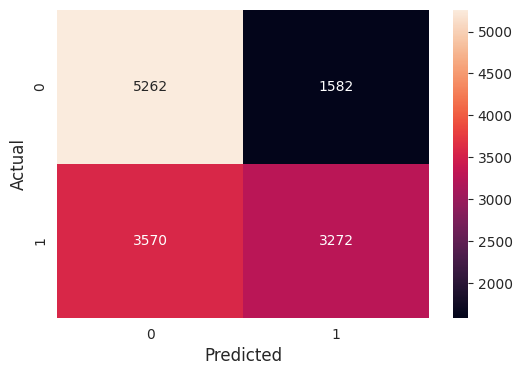

              precision    recall  f1-score   support

           0       0.60      0.77      0.67      6844
           1       0.67      0.48      0.56      6842

    accuracy                           0.62     13686
   macro avg       0.63      0.62      0.62     13686
weighted avg       0.63      0.62      0.62     13686



In [ ]:
#Create confusion matrix
# Crear matriz de confusión
conf_mat = confusion_matrix(y_test, y_pred_model1)

# Create figure and axes
# Crear figura y ejes
fig, ax = plt.subplots(figsize=(6,4))

# Create heat map of the confusion matrix with Seaborn
# Crear mapa de calor de la matriz de confusión con Seaborn
sns.heatmap(conf_mat
            , annot=True  # agregar valores en cada celda
            , fmt='d'    # formato de los valores (d = decimal)
           )

## Add labels to x and y axes
# Agregar etiquetas a los ejes x e y
plt.ylabel('Actual')
plt.xlabel('Predicted')

plt.show()


## The performance measures of the model are printed.
# Se imprimen las medidas de rendimiento del modelo
print(metrics.classification_report(y_test, y_pred_model1))

ROC - Receiver Operating Characteristic and AUC

In [ ]:
 #Funcion para imprimir la curva ROC

def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()


AUC: 0.67


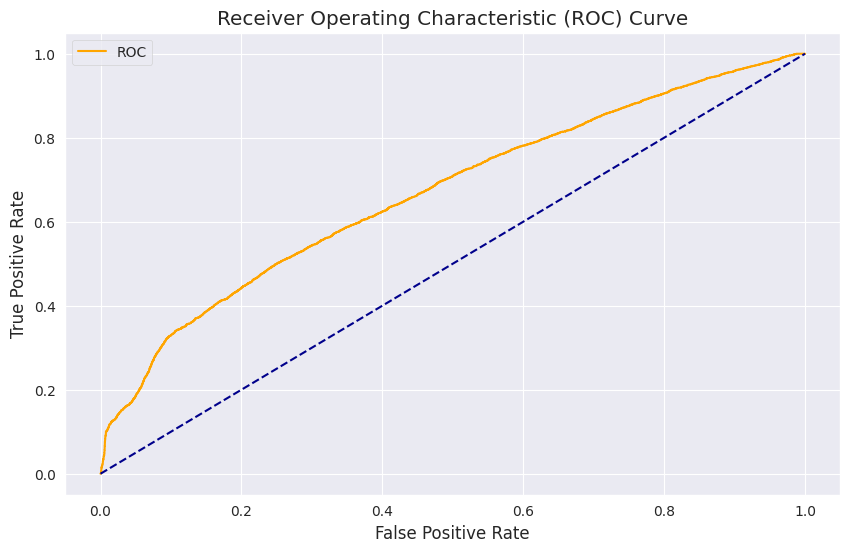

In [ ]:
fig = plt.figure(figsize=(10,6))

## Predicting positive class probabilities using the trained logistic regression model.
# Predecir las probabilidades de la clase positiva usando el modelo de regresión logística entrenado
probs = model1.predict_proba(X_test)

# Take the probabilities of the positive class only
# Tomar las probabilidades de la clase positiva solamente
probs = probs[:, 1]

# Calculate the area under the ROC curve
# Calcular el área bajo la curva ROC
auc = roc_auc_score(y_test, probs*(1))

print('AUC: %.2f' % auc)

# Calculate the ROC curve using the true values and the predicted probabilities.
# Calcular la curva ROC usando los valores verdaderos y las probabilidades predichas
fpr, tpr, thresholds = roc_curve(y_test, probs*(1))

plot_roc_curve(fpr, tpr)



In [ ]:
# Información del modelo
# ==============================================================================
print("Intercept:", model1.intercept_)
print("Accuracy of test:", model1.score(X_test, y_test))


Intercept: [0.03046586]
Accuracy of test: 0.6235569194797603


In [ ]:
model1.coef_

array([[ 0.00281665, -0.12737875, -0.11109964, -0.24426738,  0.28142072,
         0.00702124,  0.11793467, -0.1153127 , -0.03497512,  0.00775706,
        -0.06311042,  0.03872704,  0.02730893,  0.30729136,  0.17077181,
         0.02839803,  0.01370669, -0.01370669, -0.03804577, -0.09446225,
         0.73818209,  0.20024287, -0.1308755 ,  0.17216572,  0.40470271,
         0.62646365]])

In [ ]:
coef_predictors = pd.DataFrame(
                            {'feature': X.columns,
                             'coef': model1.coef_.flatten()}
                            )
print("-------------------------------------------")
print("Intercept:", model1.intercept_)
coef_predictors.sort_values('coef', ascending=False)

-------------------------------------------
Intercept: [0.03046586]


,feature,coef
20,Population_Group_GENERAL POPULATION,0.738182
25,Specialties_SPORTS MEDICINE,0.626464
24,Population_Group_VICTIMS OF ARMED CONFLICT,0.404703
13,Type_of_Service_OTHER DISCIPLINES,0.307291
4,Wait_time_between_DesiredDate_Appointment,0.281421
21,Population_Group_OTHER ETHNICITIES,0.200243
23,Population_Group_STREET DWELLER,0.172166
14,Type_of_Service_PYP (HEALTH PROMOTION AND PREV...,0.170772
6,Regime_NOT APPLICABLE,0.117935
11,Type_of_consultation_PROCEDURE,0.038727


In [ ]:
print("Accuracy train:", model1.score(X_train, y_train))
print("Accuracy test:", model1.score(X_test, y_test))

Accuracy train: 0.6215016441359152
Accuracy test: 0.6235569194797603


In [ ]:
# Predicciones probabilísticas
# ==============================================================================
# Con .predict_proba() se obtiene, para cada observación, la probabilidad predicha
# de pertenecer a cada una de las dos clases.
predicciones = model1.predict_proba(X = X_test)
predicciones = pd.DataFrame(predicciones, columns = model1.classes_)
predicciones.head(6)

,0,1
0,0.217044,0.782956
1,0.528686,0.471314
2,0.370926,0.629074
3,0.588930,0.411070
4,0.416261,0.583739
5,0.485440,0.514560


In [ ]:
# Predicciones con clasificación final
# ==============================================================================
# Con .predict() se obtiene, para cada observación, la clasificación predicha por
# el modelo. Esta clasificación se corresponde con la clase con mayor probabilidad.
predicciones = model1.predict(X = X_test)
predicciones

array([1, 0, 1, ..., 0, 0, 1])

In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.weightstats import ttest_ind

In [ ]:
# Creación del modelo utilizando matrices como en scikitlearn
# ==============================================================================
# A la matriz de predictores se le tiene que añadir una columna de 1s para el intercept del modelo
X_train0 = sm.add_constant(X_train, prepend=True)

In [ ]:
X_train0

array([[ 1.        , -1.14261912,  0.36855316, ..., -0.02565321,
        -0.06294091, -0.23968904],
       [ 1.        , -0.02592828, -0.85898841, ..., -0.02565321,
        -0.06294091, -0.23968904],
       [ 1.        ,  1.31410073,  0.50494667, ..., -0.02565321,
        -0.06294091, -0.23968904],
       ...,
       [ 1.        , -1.58929546,  0.41401767, ..., -0.02565321,
        -0.06294091, -0.23968904],
       [ 1.        , -0.24926645, -1.40456244, ..., -0.02565321,
        -0.06294091, -0.23968904],
       [ 1.        , -1.36595729,  0.41401767, ..., -0.02565321,
        -0.06294091, -0.23968904]])

In [ ]:
random.seed(0)
modelo = sm.Logit(endog=y_train, exog=X_train0,)

In [ ]:
modelo = modelo.fit()
print(modelo.summary())

         Current function value: 0.644127
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                 Status   No. Observations:                54740
Model:                          Logit   Df Residuals:                    54714
Method:                           MLE   Df Model:                           25
Date:                Wed, 06 Sep 2023   Pseudo R-squ.:                 0.07072
Time:                        18:36:47   Log-Likelihood:                -35259.
converged:                      False   LL-Null:                       -37943.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0302      0.860      0.035      0.972      -1.655       1.715
x1             0.0028      0.009      0.304      0.761      -0.01

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

# Crea un modelo de Regresión Logística con penalización L1 (Lasso)
logistic_model = LogisticRegression(penalty='l1', solver='liblinear')

# Entrena el modelo en el conjunto de entrenamiento
logistic_model.fit(X_train, y_train)

# Realiza predicciones en el conjunto de prueba
y_pred = logistic_model.predict(X_test)

# Calcula la matriz de confusión
confusion = confusion_matrix(y_test, y_pred)

print("Matriz de Confusión:")
print(confusion)

# También puedes obtener un informe de clasificación para obtener más métricas
classification_rep = classification_report(y_test, y_pred)
print("Informe de Clasificación:")
print(classification_rep)

Matriz de Confusión:
[[5264 1580]
 [3572 3270]]
Informe de Clasificación:
              precision    recall  f1-score   support

           0       0.60      0.77      0.67      6844
           1       0.67      0.48      0.56      6842

    accuracy                           0.62     13686
   macro avg       0.63      0.62      0.62     13686
weighted avg       0.63      0.62      0.62     13686



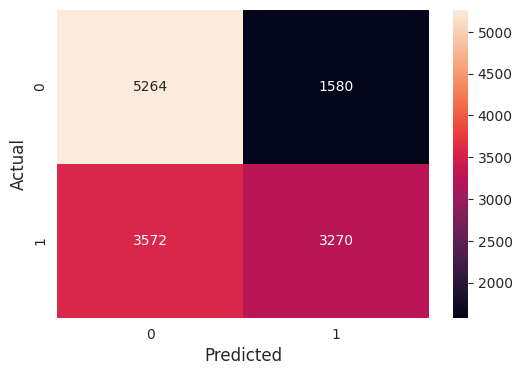

              precision    recall  f1-score   support

           0       0.60      0.77      0.67      6844
           1       0.67      0.48      0.56      6842

    accuracy                           0.62     13686
   macro avg       0.63      0.62      0.62     13686
weighted avg       0.63      0.62      0.62     13686



In [ ]:
#Create confusion matrix
# Crear matriz de confusión
conf_mat = confusion_matrix(y_test, y_pred)

# Create figure and axes
# Crear figura y ejes
fig, ax = plt.subplots(figsize=(6,4))

# Create heat map of the confusion matrix with Seaborn
# Crear mapa de calor de la matriz de confusión con Seaborn
sns.heatmap(conf_mat
            , annot=True  # agregar valores en cada celda
            , fmt='d'    # formato de los valores (d = decimal)
           )

## Add labels to x and y axes
# Agregar etiquetas a los ejes x e y
plt.ylabel('Actual')
plt.xlabel('Predicted')

plt.show()


## The performance measures of the model are printed.
# Se imprimen las medidas de rendimiento del modelo
print(metrics.classification_report(y_test, y_pred))

## **Model 2** RandomForestClassifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from sklearn import metrics


from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import confusion_matrix

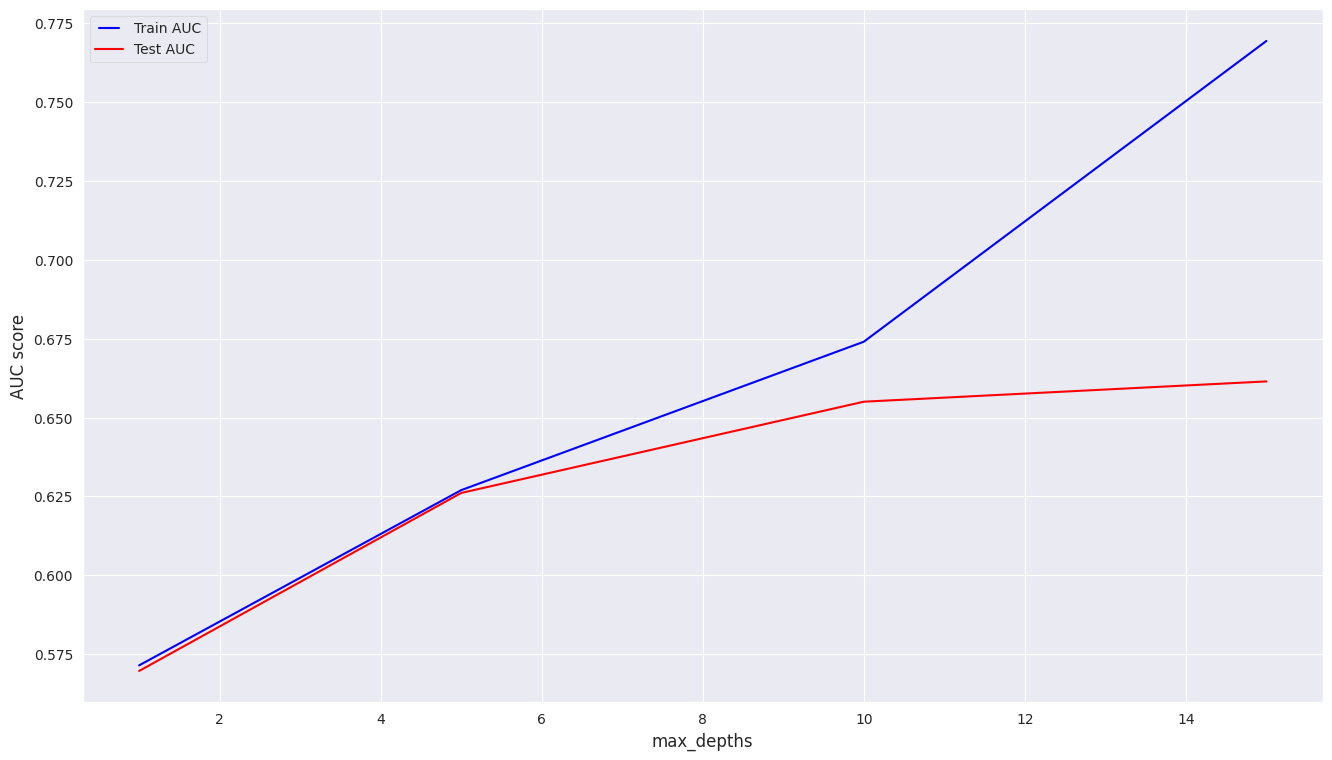

In [ ]:
random.seed(123)
max_depths = [1,5,10,15]
train_results = []
test_results = []
for i in max_depths:
   model2 = RandomForestClassifier(max_depth=i)
   model2.fit(X_train, y_train)
   train_pred = model2.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = model2.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depths, train_results, 'b', label='Train AUC')
line2, = plt.plot(max_depths, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('max_depths')
plt.show()

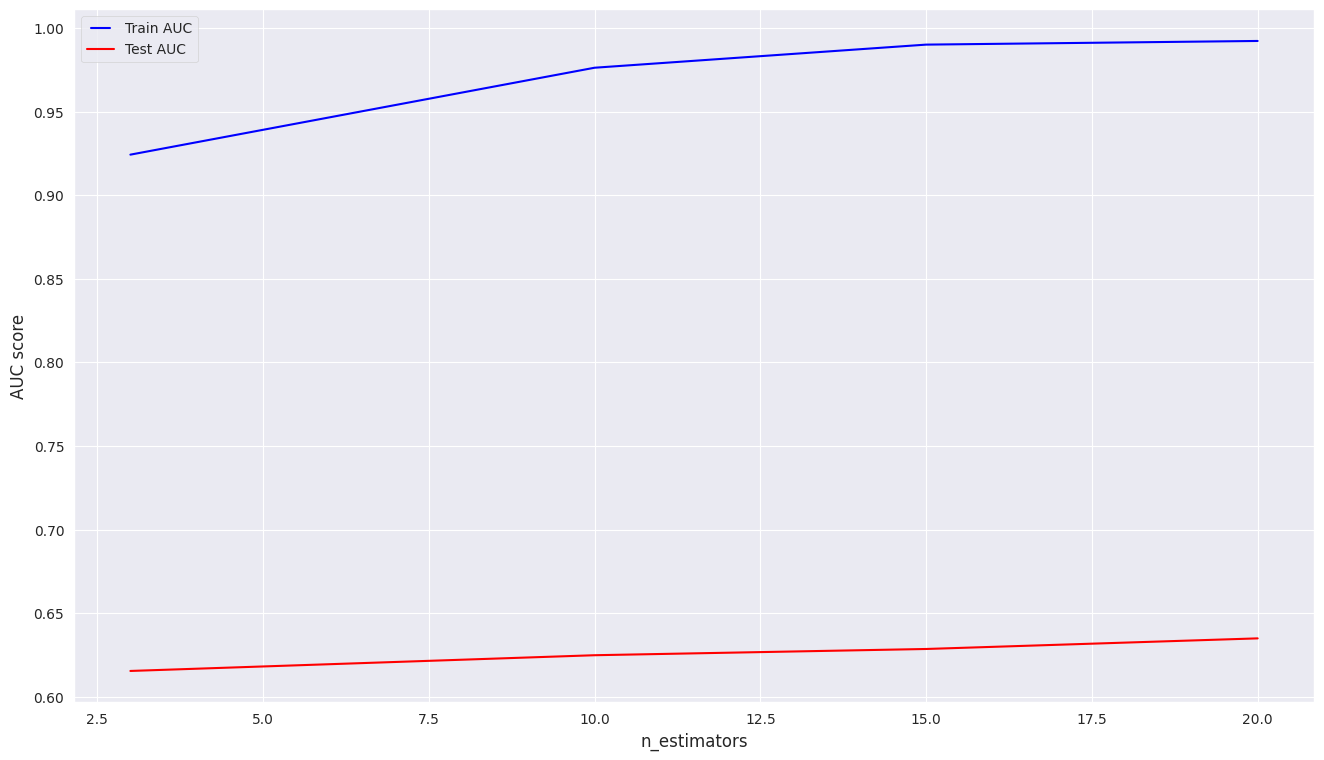

In [ ]:
random.seed(123)
estimators = [3,10,15,20]
train_results = []
test_results = []
for i in estimators:
   model2 = RandomForestClassifier(n_estimators=i)
   model2.fit(X_train, y_train)
   train_pred = model2.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = model2.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(estimators, train_results, 'b', label='Train AUC')
line2, = plt.plot(estimators, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('n_estimators')
plt.show()

In [ ]:
random.seed(123)
# Grid de hiperparámetros evaluados
# ==============================================================================
param_grid = {'n_estimators': [5,10,15],
              'max_features': ['auto', 'sqrt'],
              'max_depth'   : [ 3, 10, 15],
              'criterion'   : ['gini', 'entropy']
             }

# Búsqueda por grid search con validación cruzada
# ==============================================================================
grid = GridSearchCV(
        estimator  = RandomForestClassifier(random_state = 123),
        param_grid = param_grid,
        scoring    = 'accuracy',
        n_jobs     = 7,
        refit      = True,
        verbose    = 0,
        return_train_score = True
       )

grid.fit(X = X_train, y = y_train)

# Resultados
# ==============================================================================
resultados = pd.DataFrame(grid.cv_results_)
resultados.filter(regex = '(param*|mean_t|std_t)') \
    .drop(columns = 'params') \
    .sort_values('mean_test_score', ascending = False) \
    .head(4)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


,param_criterion,param_max_depth,param_max_features,param_n_estimators,mean_test_score,std_test_score,mean_train_score,std_train_score
11,gini,10,sqrt,15,0.650128,0.004267,0.676388,0.001162
8,gini,10,auto,15,0.650128,0.004267,0.676388,0.001162
17,gini,15,sqrt,15,0.649087,0.004915,0.772401,0.002715
14,gini,15,auto,15,0.649087,0.004915,0.772401,0.002715


In [ ]:
# Best hyperparameters by cross-validation
# ==============================================================================
print("----------------------------------------")
print("Best hyperparameters finded (cv)")
print("----------------------------------------")
print(grid.best_params_, ":", grid.best_score_, grid.scoring)

----------------------------------------
Best hyperparameters finded (cv)
----------------------------------------
{'criterion': 'gini', 'max_depth': 10, 'max_features': 'auto', 'n_estimators': 15} : 0.6501278772378517 accuracy


In [ ]:
modelo_final_RFC = grid.best_estimator_

In [ ]:
# Final model test error
# ==============================================================================
y_pred = modelo_final_RFC.predict(X_test)

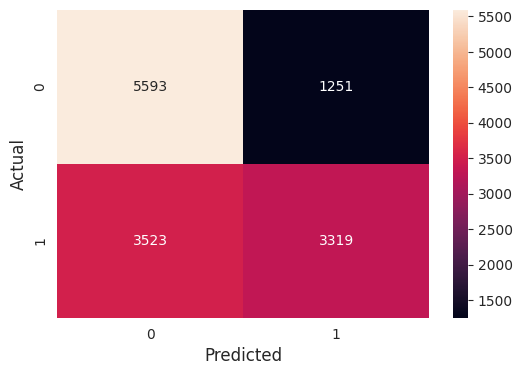

              precision    recall  f1-score   support

           0       0.61      0.82      0.70      6844
           1       0.73      0.49      0.58      6842

    accuracy                           0.65     13686
   macro avg       0.67      0.65      0.64     13686
weighted avg       0.67      0.65      0.64     13686



In [ ]:
# CConfusion matrix
conf_mat = confusion_matrix(y_test, y_pred)

# Graphic and axes
fig, ax = plt.subplots(figsize=(6,4))

# Crear mapa de calor de la matriz de confusión con Seaborn
sns.heatmap(conf_mat
            , annot=True  # agregar valores en cada celda
            , fmt='d'    # formato de los valores (d = decimal)
           )

# Agregar etiquetas a los ejes x e y
plt.ylabel('Actual')
plt.xlabel('Predicted')

# Mostrar la figura
plt.show()

# Se imprimen las medidas de rendimiento del modelo
print(metrics.classification_report(y_test, y_pred))

In [ ]:
importance_predictors = pd.DataFrame(
                            {'feature': X.columns,
                             'importance': modelo_final_RFC.feature_importances_}
                            )
print("Feature importances in the model")
print("-------------------------------------------")
importance_predictors.sort_values('importance', ascending=False)

Feature importances in the model
-------------------------------------------


,feature,importance
25,Specialties_SPORTS MEDICINE,0.147757
1,Age,0.110590
13,Type_of_Service_OTHER DISCIPLINES,0.106893
2,Appointment_time,0.102925
3,Wait_time_between_Assignment_Appointment,0.084990
4,Wait_time_between_DesiredDate_Appointment,0.084622
0,Year+Month,0.051455
7,Regime_SPECIAL,0.051165
8,Regime_SUBSIDIZED,0.037539
6,Regime_NOT APPLICABLE,0.032925


In [ ]:
print("Metric accuracy :",metrics.accuracy_score(y_test, y_pred))

Metric accuracy : 0.6511763846266257


## **Model 3**- GradientBoostingClassifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from sklearn import metrics


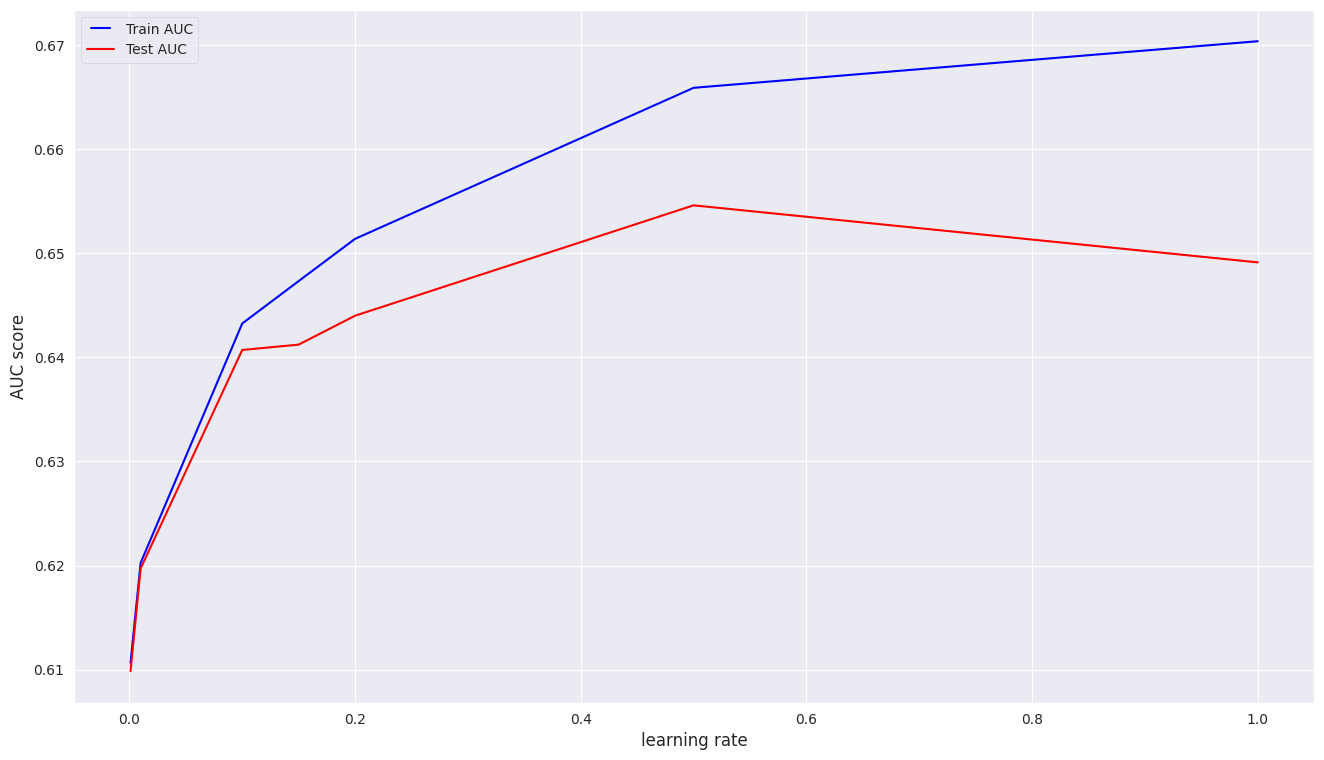

CPU times: user 38.7 s, sys: 127 ms, total: 38.8 s
Wall time: 39.7 s


In [ ]:
%%time
learning_rates = [0.001, 0.01, 0.1, 0.15, 0.2,0.5,1]
train_results = []
test_results = []
# del(false_positive_rate)
for i in learning_rates:
   model = GradientBoostingClassifier(learning_rate=i)
   model.fit(X_train, y_train)
   train_pred = model.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = model.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(learning_rates, train_results, 'b', label='Train AUC')
line2, = plt.plot(learning_rates, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('learning rate')
plt.show()

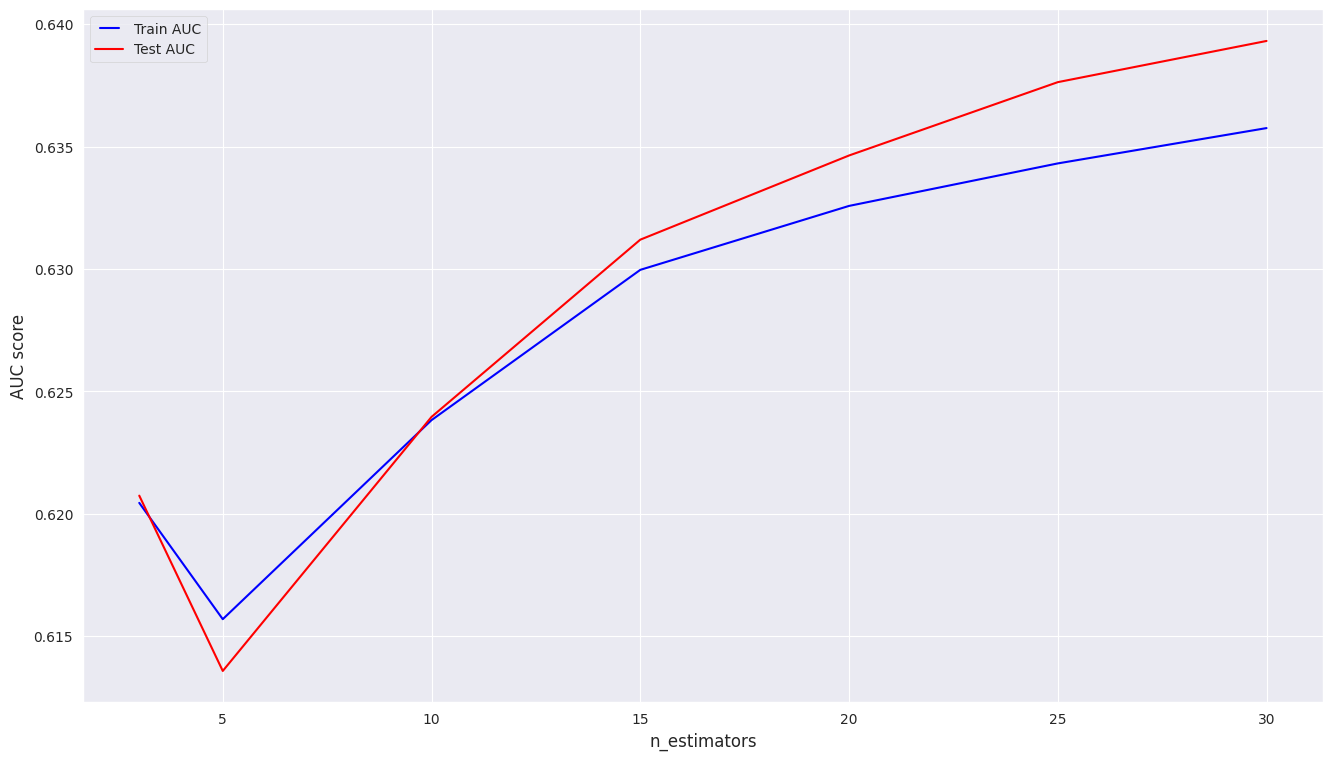

In [ ]:
estimators = [3,5,10,15,20,25,30]
train_results = []
test_results = []
for i in estimators:
   model = GradientBoostingClassifier(learning_rate=0.2,n_estimators=i)
   model.fit(X_train, y_train)
   train_pred = model.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = model.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(estimators, train_results, 'b', label='Train AUC')
line2, = plt.plot(estimators, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('n_estimators')
plt.show()

In [ ]:
%%time
random.seed(123)
# Grid de hiperparámetros evaluados (se demora aprox 50 minutos.)
# ==============================================================================
param_grid_GBC = {'n_estimators'  : [3,5,10,15],
              'max_features'  : ['auto','sqrt'],
              'loss'        :['log_loss','deviance','exponential'],
              'max_depth'     : [2, 3, 5],
              'subsample'     : [0.5, 1],
              'learning_rate' : [0.001, 0.01, 0.1, 0.15, 0.2]
             }


# Búsqueda por grid search con validación cruzada
# ==============================================================================
grid_GBC = GridSearchCV(
        estimator  = GradientBoostingClassifier(random_state=123),
        param_grid = param_grid_GBC,
        scoring    = 'f1',
        n_jobs     = - 1,
        cv         = 10,
        verbose    = 0,
        return_train_score = True
       )

grid_GBC.fit(X = X_train, y = y_train)

# Resultados
# ==============================================================================
resultados = pd.DataFrame(grid_GBC.cv_results_)
resultados.filter(regex = '(param*|mean_t|std_t)') \
    .drop(columns = 'params') \
    .sort_values('mean_test_score', ascending = False) \
    .head(4)

CPU times: user 30.7 s, sys: 5.01 s, total: 35.8 s
Wall time: 26min 21s


,param_learning_rate,param_loss,param_max_depth,param_max_features,param_n_estimators,param_subsample,mean_test_score,std_test_score,mean_train_score,std_train_score
73,0.001,deviance,3,sqrt,3,1,0.605323,0.012504,0.604394,0.014423
25,0.001,log_loss,3,sqrt,3,1,0.605323,0.012504,0.604394,0.014423
105,0.001,exponential,2,sqrt,3,1,0.605189,0.018414,0.605998,0.019529
57,0.001,deviance,2,sqrt,3,1,0.605189,0.018414,0.605998,0.019529


In [ ]:
modelo_final_GBC = grid_GBC.best_estimator_

In [ ]:
# Error de test del modelo final
# ==============================================================================
y_pred = modelo_final_GBC.predict(X = X_test)
y_pred[:10]

array([1, 1, 1, 1, 1, 0, 1, 0, 1, 1])

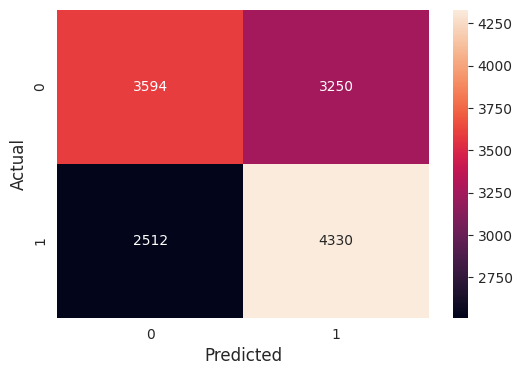

              precision    recall  f1-score   support

           0       0.59      0.53      0.56      6844
           1       0.57      0.63      0.60      6842

    accuracy                           0.58     13686
   macro avg       0.58      0.58      0.58     13686
weighted avg       0.58      0.58      0.58     13686



In [ ]:
# Crear matriz de confusión
conf_mat = confusion_matrix(y_test, y_pred)

# Crear figura y ejes
fig, ax = plt.subplots(figsize=(6,4))

# Crear mapa de calor de la matriz de confusión con Seaborn
sns.heatmap(conf_mat
            , annot=True  # agregar valores en cada celda
            , fmt='d'    # formato de los valores (d = decimal)
           )

# Agregar etiquetas a los ejes x e y
plt.ylabel('Actual')
plt.xlabel('Predicted')

# Mostrar la figura
plt.show()

# Se imprimen las medidas de rendimiento del modelo
print(metrics.classification_report(y_test, y_pred))

AUC: 0.62


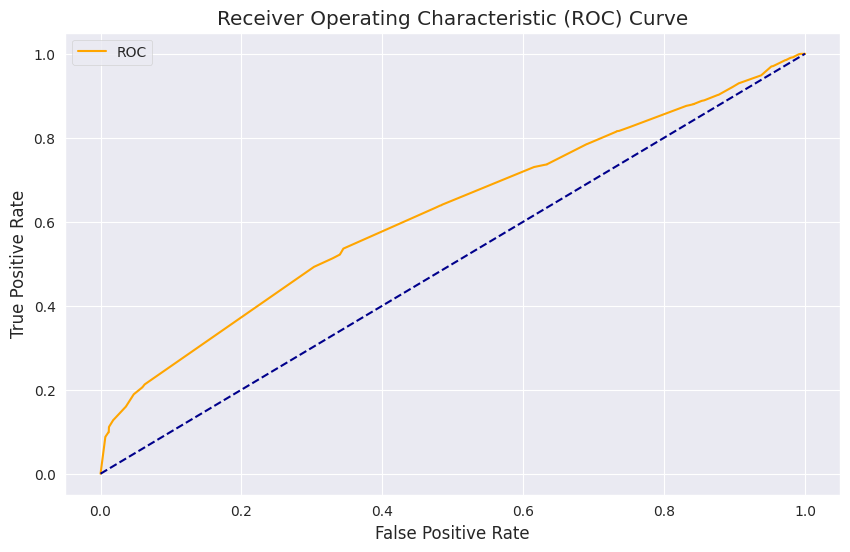

In [ ]:
fig = plt.figure(figsize=(10,6))

# Predecir las probabilidades de la clase positiva usando el modelo de regresión logística entrenado
probs = modelo_final_GBC.predict_proba(X_test)

# Tomar las probabilidades de la clase positiva solamente
probs = probs[:, 1]

# Calcular el área bajo la curva ROC
val_auc = roc_auc_score(y_test, probs*(1))

# Imprimir el valor del AUC
print('AUC: %.2f' % val_auc)

# Calcular la curva ROC usando los valores verdaderos y las probabilidades predichas
fpr, tpr, thresholds = roc_curve(y_test, probs*(1))

# Graficar la curva ROC
plot_roc_curve(fpr, tpr)


##Nota: es necesario que la variable de salida sea numérica, sino debe transformarse

In [ ]:
importancia_predictores_RFC = pd.DataFrame(
                            {'predictor': X.columns,
                             'importancia': modelo_final_GBC.feature_importances_}
                            )
print("Importancia de los predictores en el modelo")
print("-------------------------------------------")
importancia_predictores_RFC.sort_values('importancia', ascending=False)

Importancia de los predictores en el modelo
-------------------------------------------


,predictor,importancia
25,Specialties_SPORTS MEDICINE,0.488794
8,Regime_SUBSIDIZED,0.085294
2,Appointment_time,0.077139
19,Specialty_Classification_SUBSPECIALIZED,0.076829
14,Type_of_Service_PYP (HEALTH PROMOTION AND PREV...,0.063238
6,Regime_NOT APPLICABLE,0.061746
16,Type_of_Service_SPECIALIZED MEDICINE,0.061545
20,Population_Group_GENERAL POPULATION,0.042705
4,Wait_time_between_DesiredDate_Appointment,0.018494
1,Age,0.011748


## **Model 4**- K-Nearest Neighbors (KNN)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

### 4.1. Using Cross validation

In [ ]:
k_values = [i for i in range (1,35)]
scores = []

In [ ]:
%%time
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, X_train, y_train, cv=10)
    scores.append(np.mean(score))

CPU times: user 10min 22s, sys: 1.6 s, total: 10min 24s
Wall time: 6min 8s


Text(0, 0.5, 'Accuracy Score')

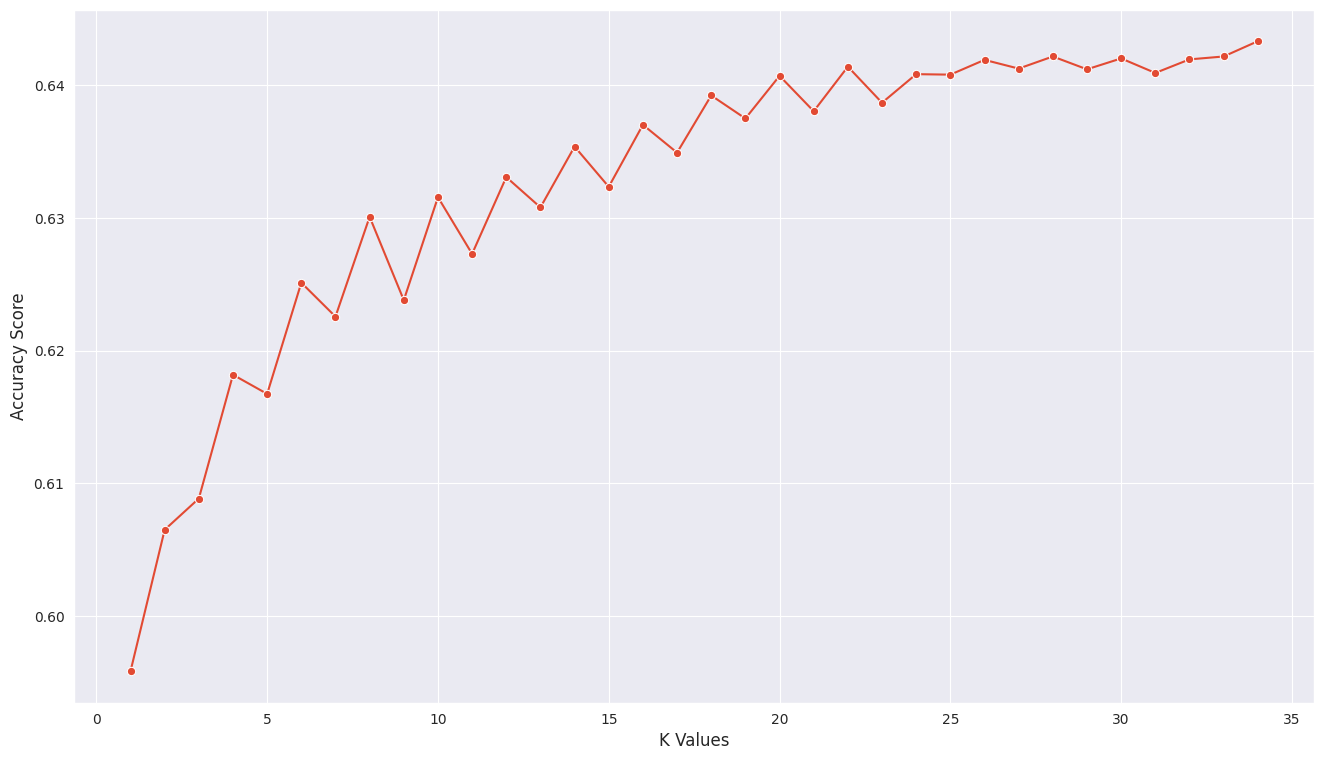

In [ ]:
sns.lineplot(x = k_values, y = scores, marker = 'o')
plt.xlabel("K Values")
plt.ylabel("Accuracy Score")

In [ ]:
best_index = np.argmax(scores)
best_k = k_values[best_index]

knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=34)

In [ ]:
y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.6517609235715329
Precision: 0.7010069713400465
Recall: 0.5290850628471208


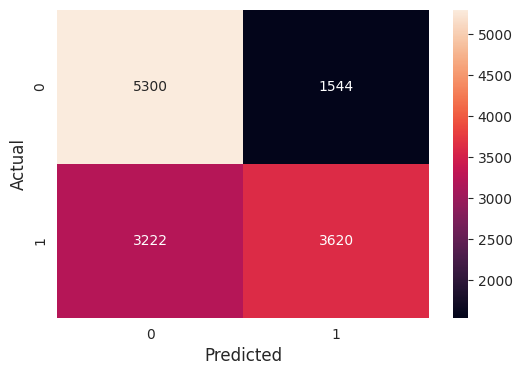

              precision    recall  f1-score   support

           0       0.62      0.77      0.69      6844
           1       0.70      0.53      0.60      6842

    accuracy                           0.65     13686
   macro avg       0.66      0.65      0.65     13686
weighted avg       0.66      0.65      0.65     13686



In [ ]:
# Crear matriz de confusión
conf_mat = confusion_matrix(y_test, y_pred)

# Crear figura y ejes
fig, ax = plt.subplots(figsize=(6,4))

# Crear mapa de calor de la matriz de confusión con Seaborn
sns.heatmap(conf_mat
            , annot=True  # agregar valores en cada celda
            , fmt='d'    # formato de los valores (d = decimal)
           )

# Agregar etiquetas a los ejes x e y
plt.ylabel('Actual')
plt.xlabel('Predicted')

# Mostrar la figura
plt.show()

# Se imprimen las medidas de rendimiento del modelo
print(metrics.classification_report(y_test, y_pred))

### 4.2. Tuning

In [ ]:
random.seed(123)
np.random.seed(123)
# Definir los valores de k para probar en GridSearch
param_grid = {'n_neighbors': [3, 5, 10,15,20,28,30,35,40,44,48,50,55]}

# Crear el modelo KNN
knn = KNeighborsClassifier()

# Realizar la búsqueda de hiperparámetros utilizando GridSearchCV
grid_search = GridSearchCV(knn, param_grid, cv=10)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 10, 15, 20, 28, 30, 35, 40, 44,
                                         48, 50, 55]})

In [ ]:
# Obtener los mejores parámetros encontrados por GridSearch
best_params = grid_search.best_params_
best_params

{'n_neighbors': 50}

In [ ]:
# Entrenar el modelo KNN con los mejores parámetros
best_knn = KNeighborsClassifier(n_neighbors=best_params['n_neighbors'])
best_knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=50)

In [ ]:
# Predecir las etiquetas en el conjunto de prueba
y_pred = best_knn.predict(X_test)
# Imprimir el informe de clasificación
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.62      0.78      0.69      6844
           1       0.70      0.52      0.60      6842

    accuracy                           0.65     13686
   macro avg       0.66      0.65      0.65     13686
weighted avg       0.66      0.65      0.65     13686



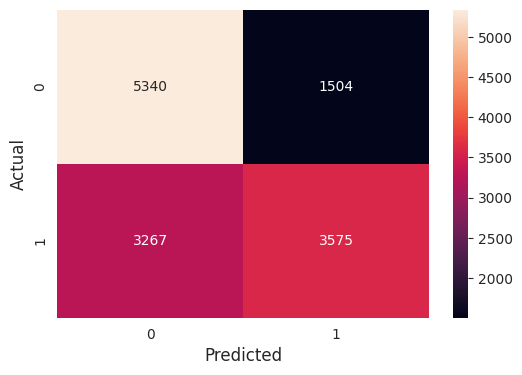

              precision    recall  f1-score   support

           0       0.62      0.78      0.69      6844
           1       0.70      0.52      0.60      6842

    accuracy                           0.65     13686
   macro avg       0.66      0.65      0.65     13686
weighted avg       0.66      0.65      0.65     13686



In [ ]:
# Crear matriz de confusión
conf_mat = confusion_matrix(y_test, y_pred)

# Crear figura y ejes
fig, ax = plt.subplots(figsize=(6,4))

# Crear mapa de calor de la matriz de confusión con Seaborn
sns.heatmap(conf_mat
            , annot=True  # agregar valores en cada celda
            , fmt='d'    # formato de los valores (d = decimal)
           )

# Agregar etiquetas a los ejes x e y
plt.ylabel('Actual')
plt.xlabel('Predicted')

# Mostrar la figura
plt.show()

# Se imprimen las medidas de rendimiento del modelo
print(metrics.classification_report(y_test, y_pred))

## **Model 5**- Support vector machine

In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn import svm
from sklearn.metrics import classification_report

In [ ]:
# Definir los valores de C y kernels para probar en GridSearch
param_grid = {'C': [0.1],
              'kernel': ['poly','rbf']}

In [ ]:
# Crear el modelo SVM
%%time
clf = svm.SVC()
# Realizar la búsqueda de hiperparámetros utilizando GridSearchCV
grid_search = GridSearchCV(clf, param_grid, cv=2)
grid_search.fit(X_train, y_train)

CPU times: user 5min 40s, sys: 589 ms, total: 5min 40s
Wall time: 5min 41s


GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [0.1], 'kernel': ['poly', 'rbf']})

In [ ]:
# Obtener los mejores parámetros encontrados por GridSearch
best_params = grid_search.best_params_
best_svm = SVC(**best_params)

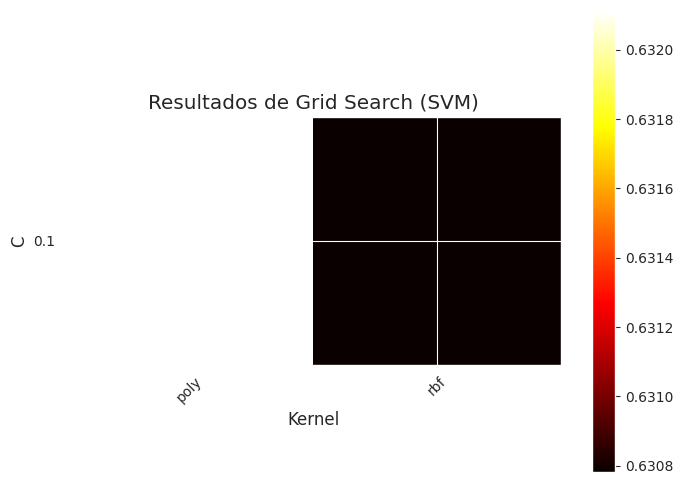

In [ ]:
# Visualizar los resultados del proceso de ajuste
scores = grid_search.cv_results_['mean_test_score'].reshape(len(param_grid['C']), len(param_grid['kernel']))

plt.figure(figsize=(8, 6))
plt.imshow(scores, interpolation='nearest', cmap=plt.cm.hot)
plt.title('Resultados de Grid Search (SVM)')
plt.xlabel('Kernel')
plt.ylabel('C')
plt.colorbar()
plt.xticks(np.arange(len(param_grid['kernel'])), param_grid['kernel'], rotation=45)
plt.yticks(np.arange(len(param_grid['C'])), param_grid['C'])
plt.show()

In [ ]:
# Entrenar el modelo SVM con los mejores parámetros
best_svm.fit(X_train, y_train)

SVC(C=0.1, kernel='poly')

In [ ]:
# Predecir las etiquetas en el conjunto de prueba
y_pred = best_svm.predict(X_test)

In [ ]:
# Imprimir el informe de clasificación
print("Informe de clasificación para SVM:")
print(classification_report(y_test, y_pred))

Informe de clasificación para SVM:
              precision    recall  f1-score   support

           0       0.60      0.82      0.69      6844
           1       0.72      0.44      0.55      6842

    accuracy                           0.63     13686
   macro avg       0.66      0.63      0.62     13686
weighted avg       0.66      0.63      0.62     13686



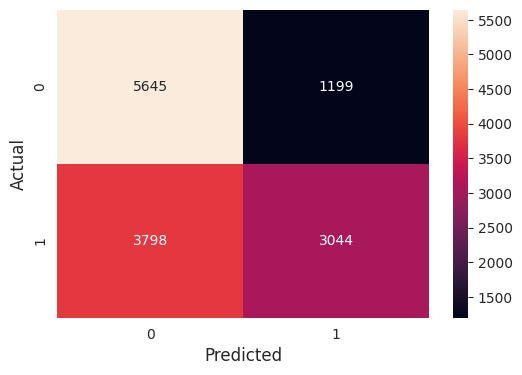

              precision    recall  f1-score   support

           0       0.60      0.82      0.69      6844
           1       0.72      0.44      0.55      6842

    accuracy                           0.63     13686
   macro avg       0.66      0.63      0.62     13686
weighted avg       0.66      0.63      0.62     13686



In [ ]:
# Crear matriz de confusión
conf_mat = confusion_matrix(y_test, y_pred)

# Crear figura y ejes
fig, ax = plt.subplots(figsize=(6,4))

# Crear mapa de calor de la matriz de confusión con Seaborn
sns.heatmap(conf_mat
            , annot=True  # agregar valores en cada celda
            , fmt='d'    # formato de los valores (d = decimal)
           )

# Agregar etiquetas a los ejes x e y
plt.ylabel('Actual')
plt.xlabel('Predicted')

# Mostrar la figura
plt.show()

# Se imprimen las medidas de rendimiento del modelo
print(metrics.classification_report(y_test, y_pred))

Low C implies we are allowing more outliers and high C implies less outliers.

# comparacion


NameError: ignored

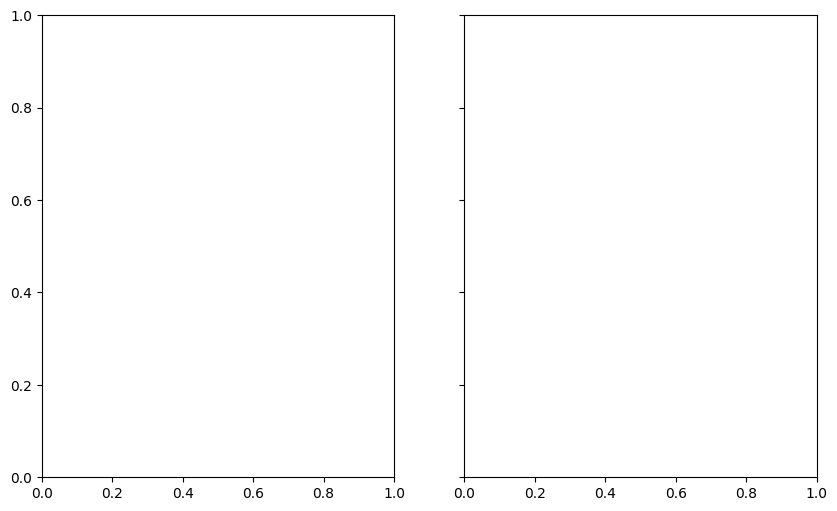

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import LearningCurveDisplay, ShuffleSplit

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 6), sharey=True)

common_params = {
    "X": X_resampled,
    "y": y_resampled,
    "train_sizes": np.linspace(0.1, 1.0, 5),
    "cv": ShuffleSplit(n_splits=10, test_size=0.2, random_state=0),
    "score_type": "both",
    "n_jobs": -1,
    "line_kw": {"marker": "o"},
    "std_display_style": "fill_between",
    "score_name": "Accuracy",
}

for ax_idx, estimator in enumerate([modelo_final_GBC, modelo_final_RFC]):
    LearningCurveDisplay.from_estimator(estimator, **common_params, ax=ax[ax_idx])
    handles, label = ax[ax_idx].get_legend_handles_labels()
    ax[ax_idx].legend(handles[:2], ["Training Score", "Test Score"])
    ax[ax_idx].set_title(f"Learning Curve for {estimator.__class__.__name__}")